In [50]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [52]:

# replace with your folder's path
folder_path = r"S:/INFO/Projects/Industrial Human Resource Geo-Visualization/data/"
all_files = os.listdir(folder_path)
# Filter out non-CSV files
csv_files = [f for f in all_files if f.endswith('.csv')]

# Create a list to hold the dataframes
df_list = []

for csv in csv_files:
    file_path = os.path.join(folder_path, csv)
    try:
        # Try reading the file using default UTF-8 encoding
        df = pd.read_csv(file_path)
        df_list.append(df)
    except UnicodeDecodeError:
        try:
            # If UTF-8 fails, try reading the file using UTF-16 encoding with tab separator
            df = pd.read_csv(file_path, encoding='cp1252')
            df_list.append(df)
        except Exception as e:
            print(f"Could not read file {csv} because of error: {e}")
    except Exception as e:
        print(f"Could not read file {csv} because of error: {e}")

# Concatenate all data into one DataFrame
big_df = pd.concat(df_list, ignore_index=True)

# Save the final result to a new CSV file
big_df.to_csv(os.path.join(folder_path, 'combined.csv'), index=False)



In [53]:
df=pd.read_csv(r"S:/INFO/Projects/Industrial Human Resource Geo-Visualization/data/combined.csv")


In [54]:
df

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585430,`19,`345,District - Purba Medinipur,`99,`990,`9900,Activities of extraterritorial organizations a...,18,12,6,...,6,0,0,0,0,0,0,0,0,0
585431,`19,`345,District - Purba Medinipur,`99,`991,`0000,Blank,8244,5866,2378,...,876,25591,8488,17103,22057,7272,14785,3534,1216,2318
585432,`19,`345,District - Purba Medinipur,`99,`991,`9910,Blank,8244,5866,2378,...,876,25591,8488,17103,22057,7272,14785,3534,1216,2318
585433,`19,`345,District - Purba Medinipur,`99,`992,`0000,Incomplete description/ Wrongly Classifed,8324,4604,3720,...,932,14872,3352,11520,13204,2934,10270,1668,418,1250


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585435 entries, 0 to 585434
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           585435 non-null  object
 1   District Code                        585435 non-null  object
 2   India/States                         585435 non-null  object
 3   Division                             585435 non-null  object
 4   Group                                585435 non-null  object
 5   Class                                585435 non-null  object
 6   NIC Name                             585435 non-null  object
 7   Main Workers - Total -  Persons      585435 non-null  int64 
 8   Main Workers - Total - Males         585435 non-null  int64 
 9   Main Workers - Total - Females       585435 non-null  int64 
 10  Main Workers - Rural -  Persons      585435 non-null  int64 
 11  Main Workers - Rural - Mal

In [56]:
df.isnull().sum()

State Code                             0
District Code                          0
India/States                           0
Division                               0
Group                                  0
Class                                  0
NIC Name                               0
Main Workers - Total -  Persons        0
Main Workers - Total - Males           0
Main Workers - Total - Females         0
Main Workers - Rural -  Persons        0
Main Workers - Rural - Males           0
Main Workers - Rural - Females         0
Main Workers - Urban -  Persons        0
Main Workers - Urban - Males           0
Main Workers - Urban - Females         0
Marginal Workers - Total -  Persons    0
Marginal Workers - Total - Males       0
Marginal Workers - Total - Females     0
Marginal Workers - Rural -  Persons    0
Marginal Workers - Rural - Males       0
Marginal Workers - Rural - Females     0
Marginal Workers - Urban -  Persons    0
Marginal Workers - Urban - Males       0
Marginal Workers

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Main Workers - Total - Persons,585435.0,1492.137518,45681.612949,0.0,6.0,28.0,188.0,15619759.0
Main Workers - Total - Males,585435.0,1193.171150,37739.106311,0.0,6.0,23.0,145.0,12801403.0
Main Workers - Total - Females,585435.0,298.966369,8582.003985,0.0,0.0,3.0,24.0,2818356.0
Main Workers - Rural - Persons,585435.0,660.618719,20444.330018,0.0,2.0,12.0,74.0,6770444.0
Main Workers - Rural - Males,585435.0,517.035312,16542.917851,0.0,1.0,8.0,56.0,5446541.0
Main Workers - Rural - Females,585435.0,143.583407,4314.438999,0.0,0.0,0.0,8.0,1323903.0
Main Workers - Urban - Persons,585435.0,831.518799,25867.767606,0.0,2.0,12.0,86.0,8849315.0
Main Workers - Urban - Males,585435.0,676.135837,21673.356771,0.0,1.0,9.0,67.0,7354862.0
Main Workers - Urban - Females,585435.0,155.382961,4531.585040,0.0,0.0,0.0,12.0,1494453.0
Marginal Workers - Total - Persons,585435.0,364.267186,11769.380192,0.0,0.0,4.0,28.0,3834122.0


In [58]:
df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females'],
      dtype='object')

In [59]:
df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females'],
      dtype='object')

In [60]:
df["State Code"].unique()

array(['`07', '`16', '`20', '`24', '`27', '`29', '`30', '`32', '`33',
       '`34', '`02', '`05', '`09', '`10', '`11', '`13', '`18', '`21',
       '`08', '`12', '`14', '`15', '`19'], dtype=object)

In [61]:
df.describe()

,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,Main Workers - Rural - Persons,Main Workers - Rural - Males,Main Workers - Rural - Females,Main Workers - Urban - Persons,Main Workers - Urban - Males,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
count,5.854350e+05,5.854350e+05,5.854350e+05,5.854350e+05,5.854350e+05,5.854350e+05,5.854350e+05,5.854350e+05,5.854350e+05,5.854350e+05,5.854350e+05,5.854350e+05,5.854350e+05,5.854350e+05,5.854350e+05,5.854350e+05,585435.000000,585435.000000
mean,1.492138e+03,1.193171e+03,2.989664e+02,6.606187e+02,5.170353e+02,1.435834e+02,8.315188e+02,6.761358e+02,1.553830e+02,3.642672e+02,1.826322e+02,1.816350e+02,2.502286e+02,1.165241e+02,1.337045e+02,1.140386e+02,66.108094,47.930472
std,4.568161e+04,3.773911e+04,8.582004e+03,2.044433e+04,1.654292e+04,4.314439e+03,2.586777e+04,2.167336e+04,4.531585e+03,1.176938e+04,5.760565e+03,6.309689e+03,8.232260e+03,3.723071e+03,4.748452e+03,3.842882e+03,2132.578084,1803.268154
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,6.000000e+00,6.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,2.800000e+01,2.300000e+01,3.000000e+00,1.200000e+01,8.000000e+00,0.000000e+00,1.200000e+01,9.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,1.880000e+02,1.450000e+02,2.400000e+01,7.400000e+01,5.600000e+01,8.000000e+00,8.600000e+01,6.700000e+01,1.200000e+01,2.800000e+01,1.800000e+01,6.000000e+00,1.400000e+01,8.000000e+00,3.000000e+00,9.000000e+00,6.000000,2.000000
max,1.561976e+07,1.280140e+07,2.818356e+06,6.770444e+06,5.446541e+06,1.323903e+06,8.849315e+06,7.354862e+06,1.494453e+06,3.834122e+06,1.966750e+06,1.867372e+06,2.515182e+06,1.223824e+06,1.291358e+06,1.318940e+06,742926.000000,576014.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585435 entries, 0 to 585434
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           585435 non-null  object
 1   District Code                        585435 non-null  object
 2   India/States                         585435 non-null  object
 3   Division                             585435 non-null  object
 4   Group                                585435 non-null  object
 5   Class                                585435 non-null  object
 6   NIC Name                             585435 non-null  object
 7   Main Workers - Total -  Persons      585435 non-null  int64 
 8   Main Workers - Total - Males         585435 non-null  int64 
 9   Main Workers - Total - Females       585435 non-null  int64 
 10  Main Workers - Rural -  Persons      585435 non-null  int64 
 11  Main Workers - Rural - Mal

In [63]:
df.nunique()

State Code                               23
District Code                           472
India/States                            491
Division                                 89
Group                                   241
Class                                   423
NIC Name                                587
Main Workers - Total -  Persons        8679
Main Workers - Total - Males           7811
Main Workers - Total - Females         3970
Main Workers - Rural -  Persons        5767
Main Workers - Rural - Males           5218
Main Workers - Rural - Females         2694
Main Workers - Urban -  Persons        6561
Main Workers - Urban - Males           5934
Main Workers - Urban - Females         2929
Marginal Workers - Total -  Persons    4208
Marginal Workers - Total - Males       3181
Marginal Workers - Total - Females     2850
Marginal Workers - Rural -  Persons    3406
Marginal Workers - Rural - Males       2535
Marginal Workers - Rural - Females     2379
Marginal Workers - Urban -  Pers

In [64]:
df.isnull().sum()

State Code                             0
District Code                          0
India/States                           0
Division                               0
Group                                  0
Class                                  0
NIC Name                               0
Main Workers - Total -  Persons        0
Main Workers - Total - Males           0
Main Workers - Total - Females         0
Main Workers - Rural -  Persons        0
Main Workers - Rural - Males           0
Main Workers - Rural - Females         0
Main Workers - Urban -  Persons        0
Main Workers - Urban - Males           0
Main Workers - Urban - Females         0
Marginal Workers - Total -  Persons    0
Marginal Workers - Total - Males       0
Marginal Workers - Total - Females     0
Marginal Workers - Rural -  Persons    0
Marginal Workers - Rural - Males       0
Marginal Workers - Rural - Females     0
Marginal Workers - Urban -  Persons    0
Marginal Workers - Urban - Males       0
Marginal Workers

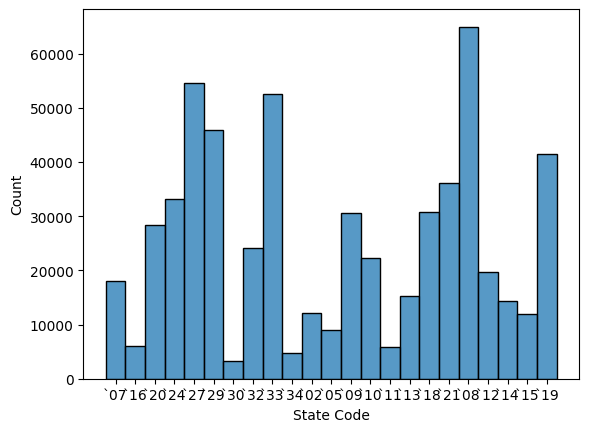

In [65]:
#Data visualization:
sns.histplot(x='State Code', data=df )
plt.show()

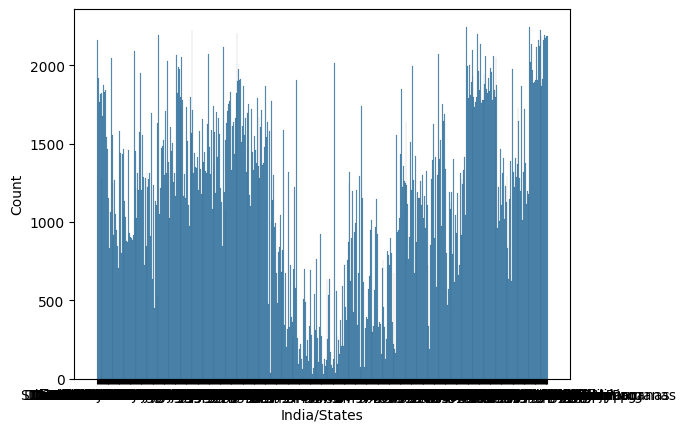

In [66]:
sns.histplot(x="India/States", data=df)
plt.show()

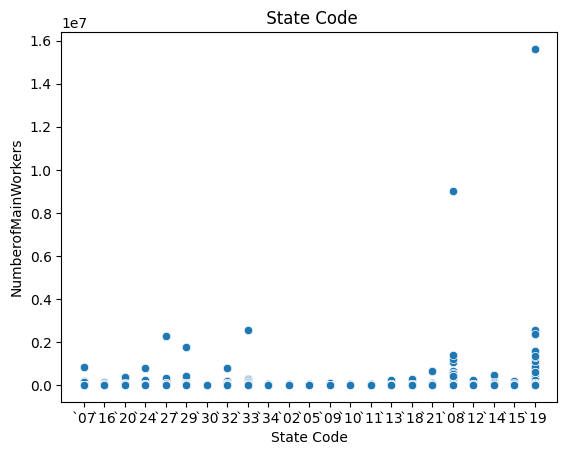

In [67]:
y_var = "Main Workers - Total -  Persons".strip()
sns.scatterplot(x='State Code', y=y_var, data=df)
plt.xlabel('State Code')
plt.ylabel('NumberofMainWorkers')
plt.title(' State Code')
plt.show()

In [68]:
df['Total_workers'] = (df['Main Workers - Total -  Persons'] + df['Marginal Workers - Total -  Persons'])

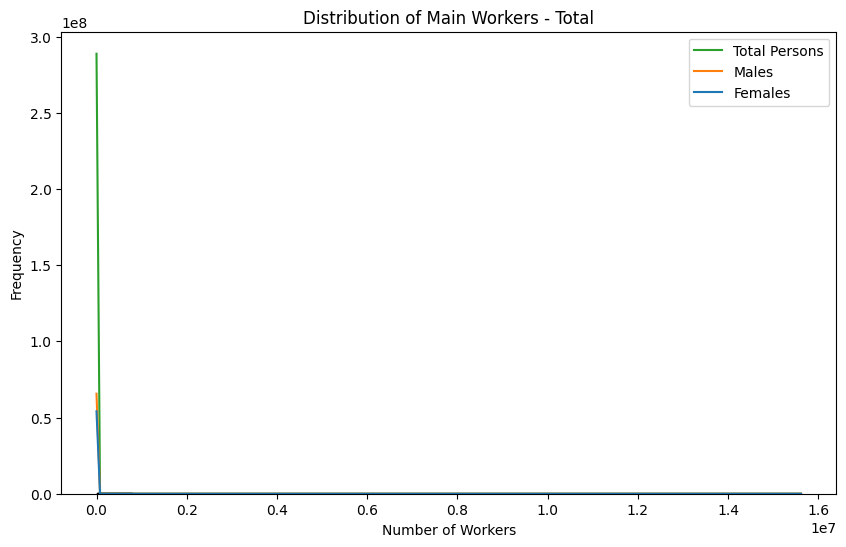

In [69]:
# Main Workers - Total -  Persons:
plt.figure(figsize=(10, 6))
sns.histplot(df[['Main Workers - Total -  Persons', 'Main Workers - Total - Males', 'Main Workers - Total - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Main Workers - Total')
plt.show()

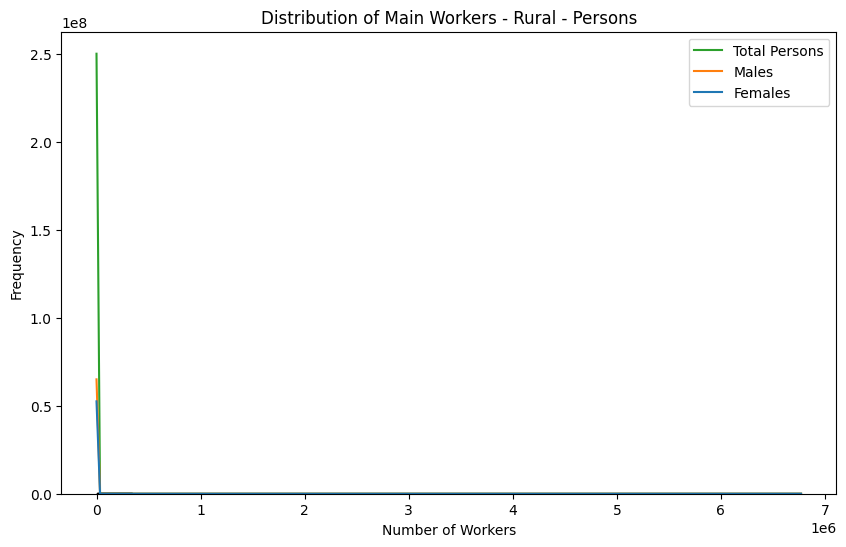

In [70]:
# Main Workers - Rural
plt.figure(figsize=(10, 6))
sns.histplot(df[['Main Workers - Rural -  Persons', 'Main Workers - Rural - Males', 'Main Workers - Rural - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Main Workers - Rural - Persons')
plt.show()

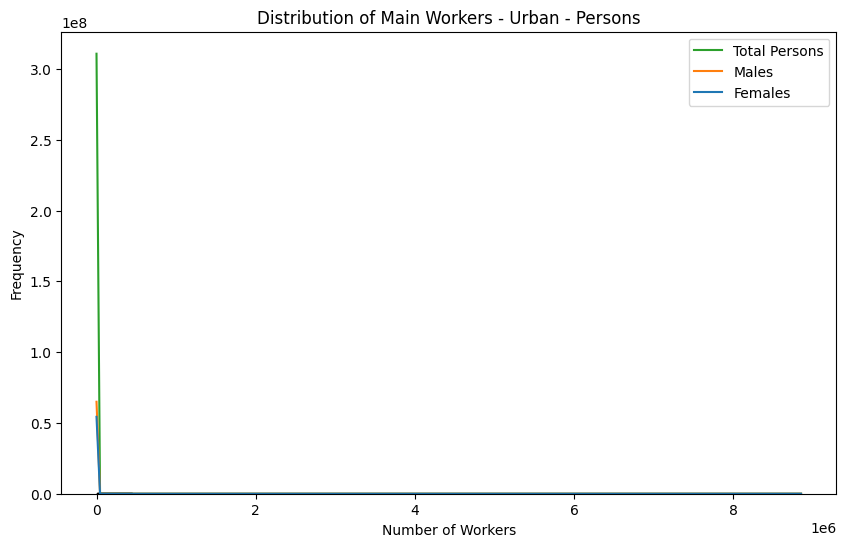

In [72]:
# Main Workers - Urban-persons:
plt.figure(figsize=(10, 6))
sns.histplot(df[['Main Workers - Urban -  Persons', 'Main Workers - Urban - Males', 'Main Workers - Urban - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Main Workers - Urban - Persons')
plt.show()

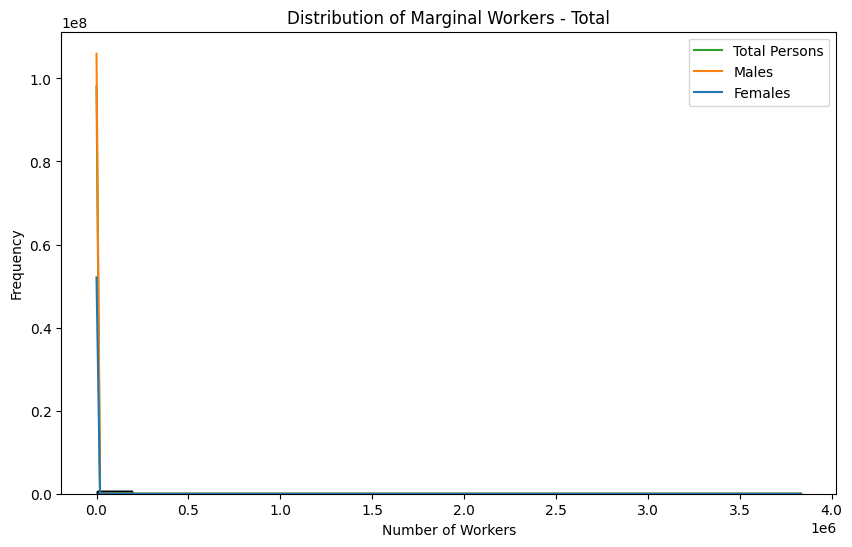

In [74]:
# Marginal Workers - Total - Persons:
plt.figure(figsize=(10, 6))
sns.histplot(df[['Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Marginal Workers - Total')
plt.show()

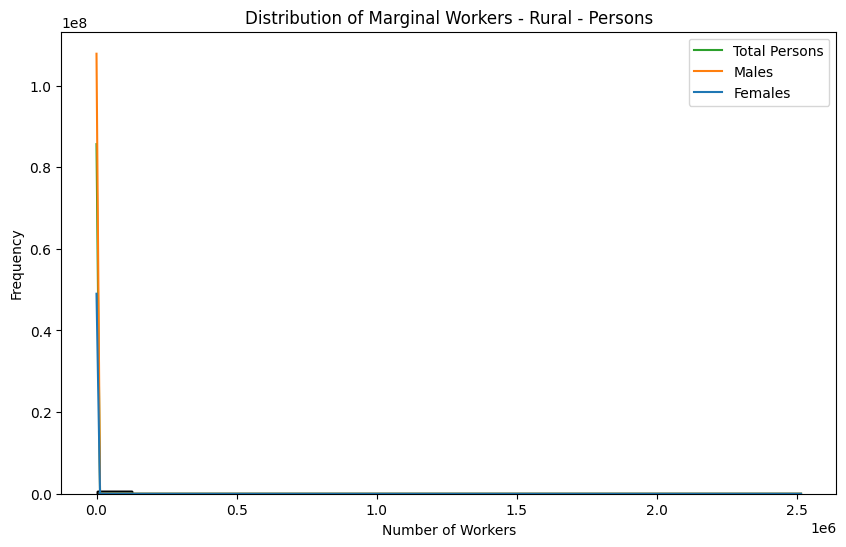

In [75]:
# Marginal Workers - Rural - Persons:
plt.figure(figsize=(10, 6))
sns.histplot(df[['Marginal Workers - Rural -  Persons', 'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Marginal Workers - Rural - Persons')
plt.show()

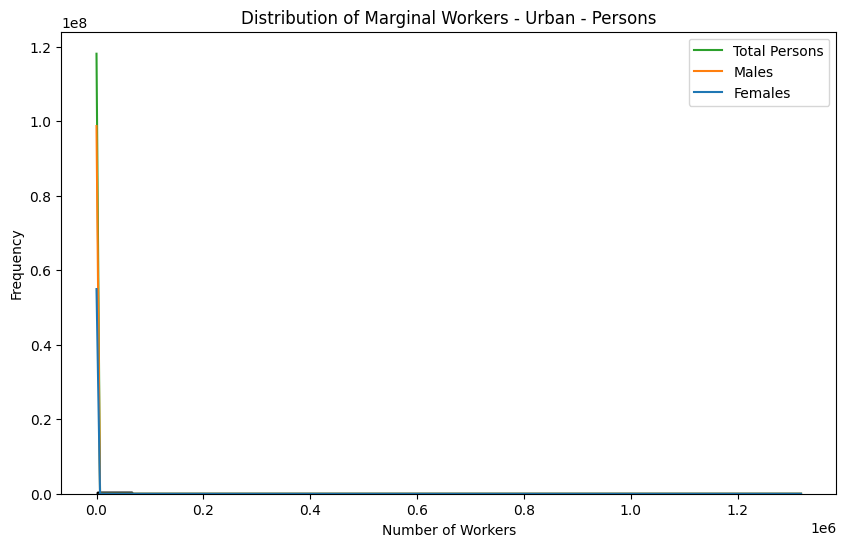

In [76]:
# Marginal Workers - Urban - Persons:
plt.figure(figsize=(10, 6))
sns.histplot(df[['Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males', 'Marginal Workers - Urban - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Marginal Workers - Urban - Persons')
plt.show()

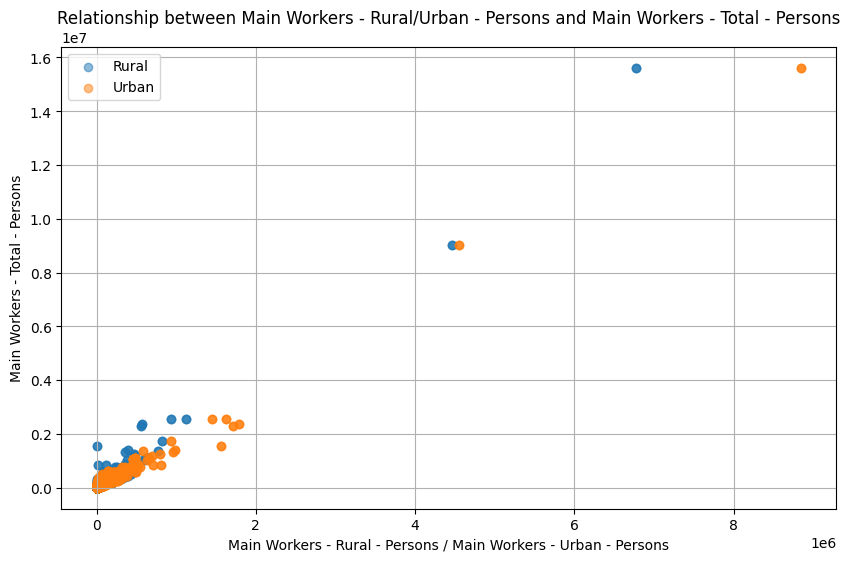

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Main Workers - Rural -  Persons'], df['Main Workers - Total -  Persons'], label='Rural', alpha=0.5)
plt.scatter(df['Main Workers - Urban -  Persons'], df['Main Workers - Total -  Persons'], label='Urban', alpha=0.5)
plt.xlabel('Main Workers - Rural - Persons / Main Workers - Urban - Persons')
plt.ylabel('Main Workers - Total - Persons')
plt.title('Relationship between Main Workers - Rural/Urban - Persons and Main Workers - Total - Persons')
plt.legend()
plt.grid(True)
plt.show()

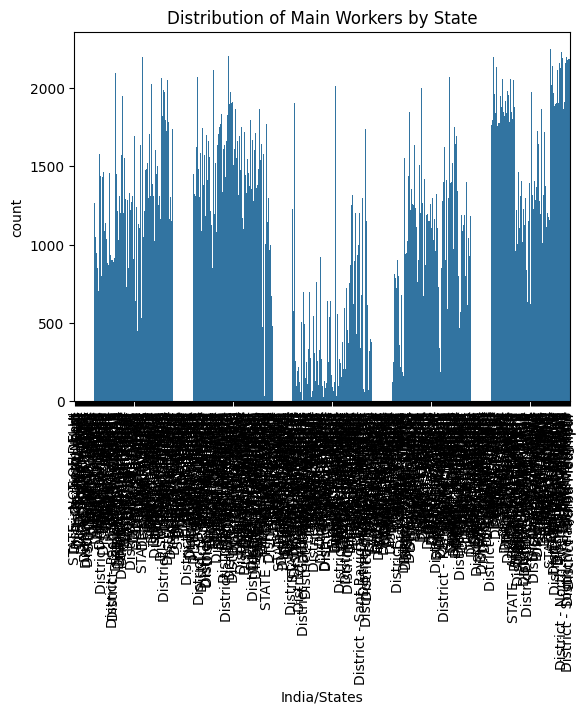

In [78]:
sns.countplot(x='India/States', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Main Workers by State')
plt.show()

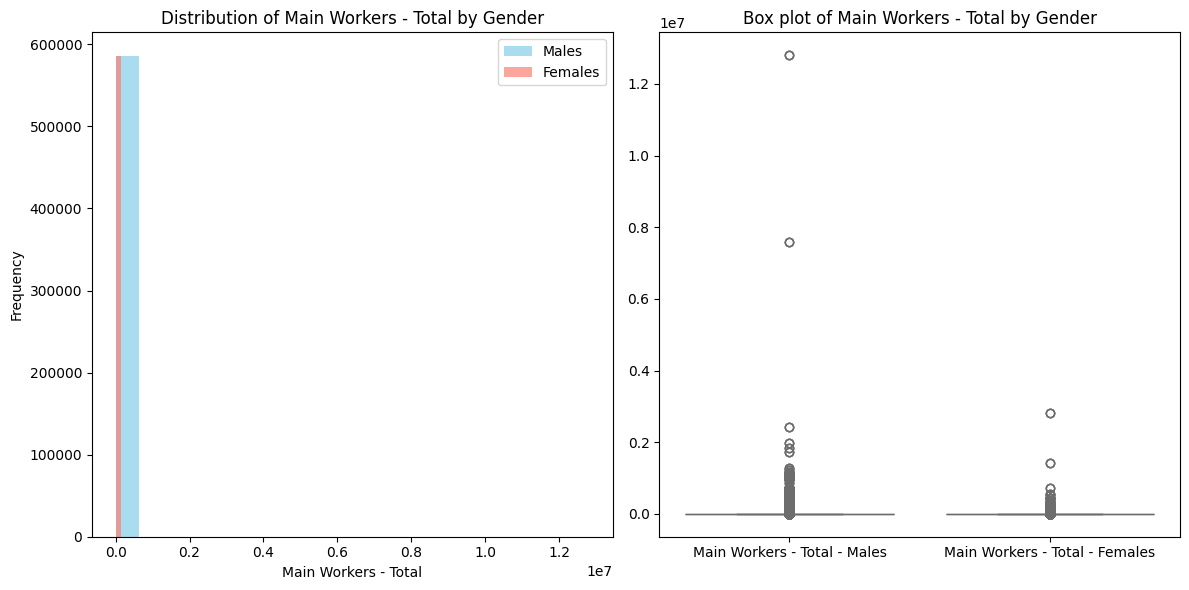

In [79]:
# Histogram for 'Main Workers - Total - Persons'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Main Workers - Total - Males'], bins=20, color='skyblue', alpha=0.7, label='Males')
plt.hist(df['Main Workers - Total - Females'], bins=20, color='salmon', alpha=0.7, label='Females')
plt.xlabel('Main Workers - Total')
plt.ylabel('Frequency')
plt.title('Distribution of Main Workers - Total by Gender')
plt.legend()

# Box plot for 'Main Workers - Total - Persons'
plt.subplot(1, 2, 2)
sns.boxplot(data=df[['Main Workers - Total - Males', 'Main Workers - Total - Females']], palette=['skyblue', 'salmon'])
plt.title('Box plot of Main Workers - Total by Gender')

plt.tight_layout()
plt.show()

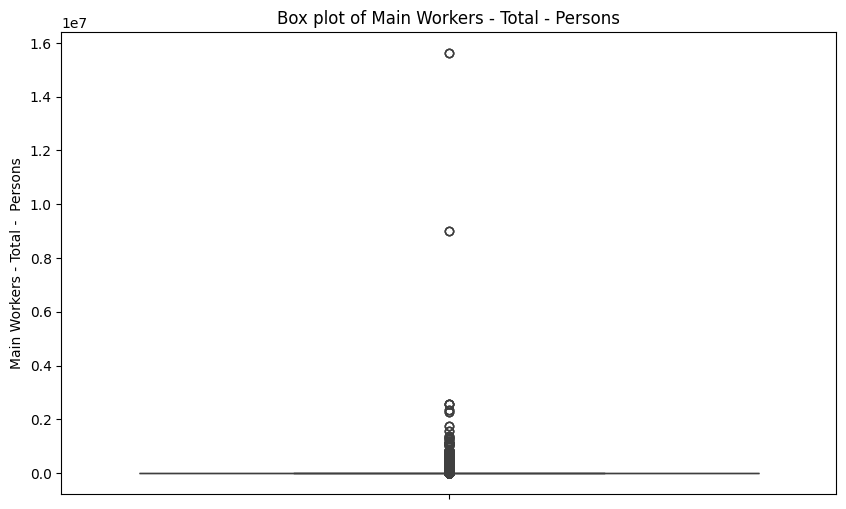

In [80]:
# Box plot for 'Main Workers - Total - Persons'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Main Workers - Total -  Persons'])
plt.title('Box plot of Main Workers - Total - Persons')
plt.show()

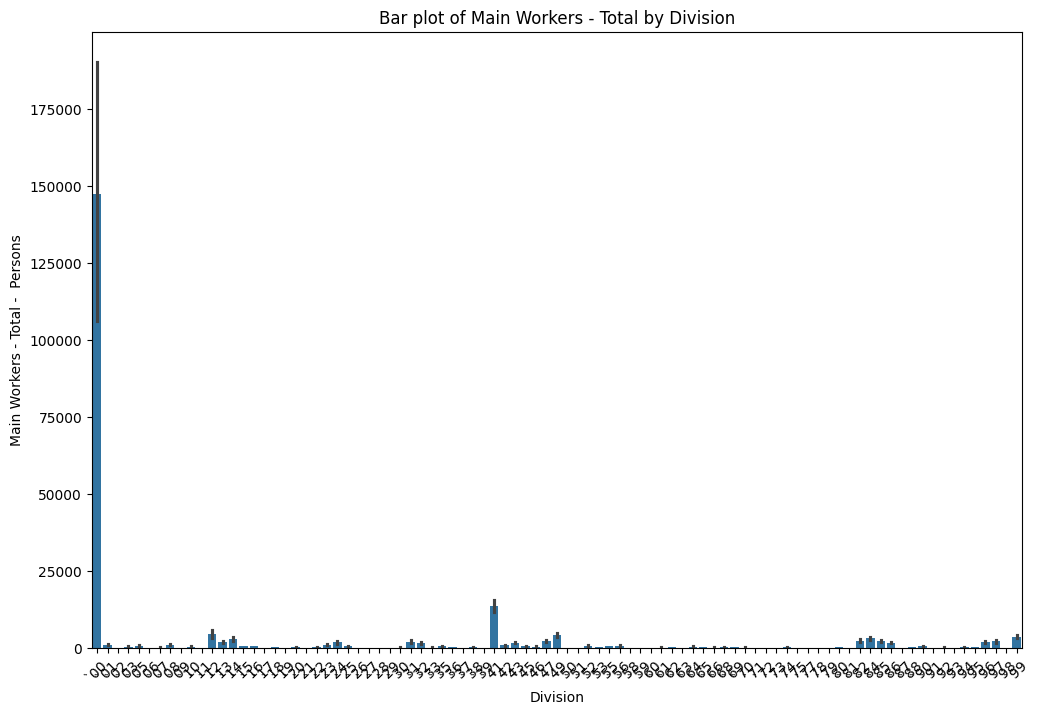

In [81]:
# Bar plot for 'Main Workers - Total' by 'Division'
plt.figure(figsize=(12, 8))
sns.barplot(x='Division', y='Main Workers - Total -  Persons', data=df)
plt.title('Bar plot of Main Workers - Total by Division')
plt.xticks(rotation=45)
plt.show()

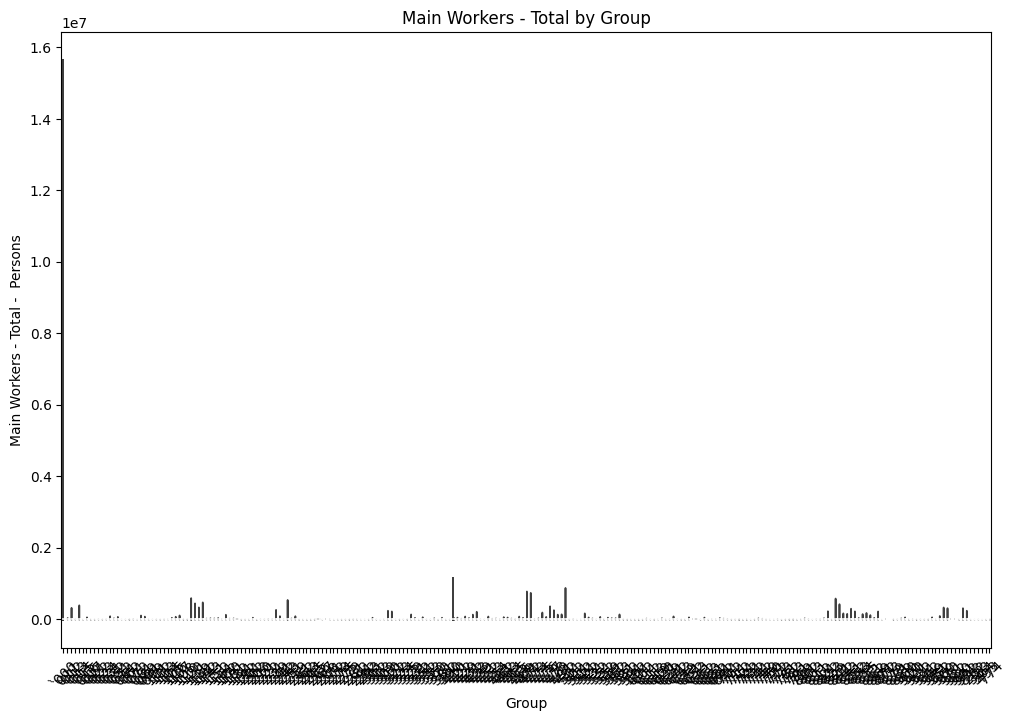

In [82]:
# Main Workers - Total' by 'Group'
plt.figure(figsize=(12, 8))
sns.violinplot(x='Group', y='Main Workers - Total -  Persons', data=df)
plt.title('Main Workers - Total by Group')
plt.xticks(rotation=45)
plt.show()

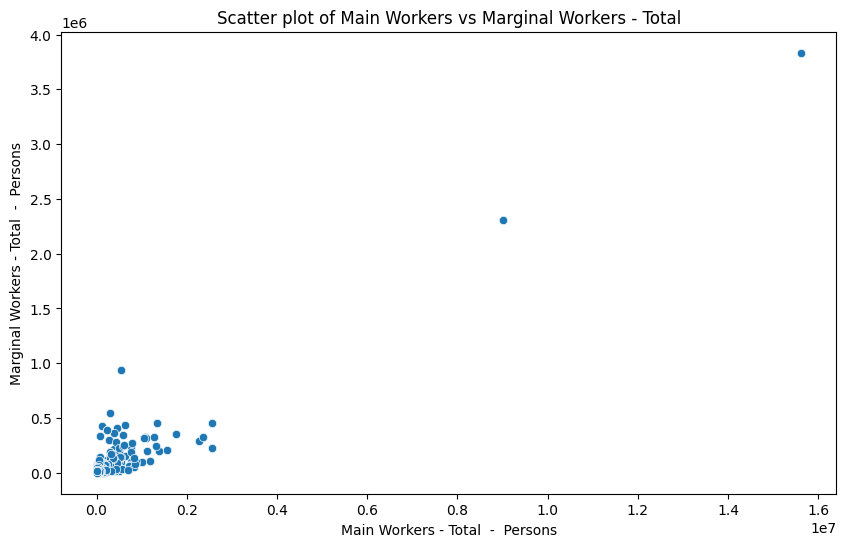

In [83]:
# Scatter plot for 'Main Workers - Total' vs 'Marginal Workers - Total'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Main Workers - Total -  Persons', y='Marginal Workers - Total -  Persons', data=df)
plt.title('Scatter plot of Main Workers vs Marginal Workers - Total')
plt.xlabel('Main Workers - Total  -  Persons')
plt.ylabel('Marginal Workers - Total  -  Persons')
plt.show()

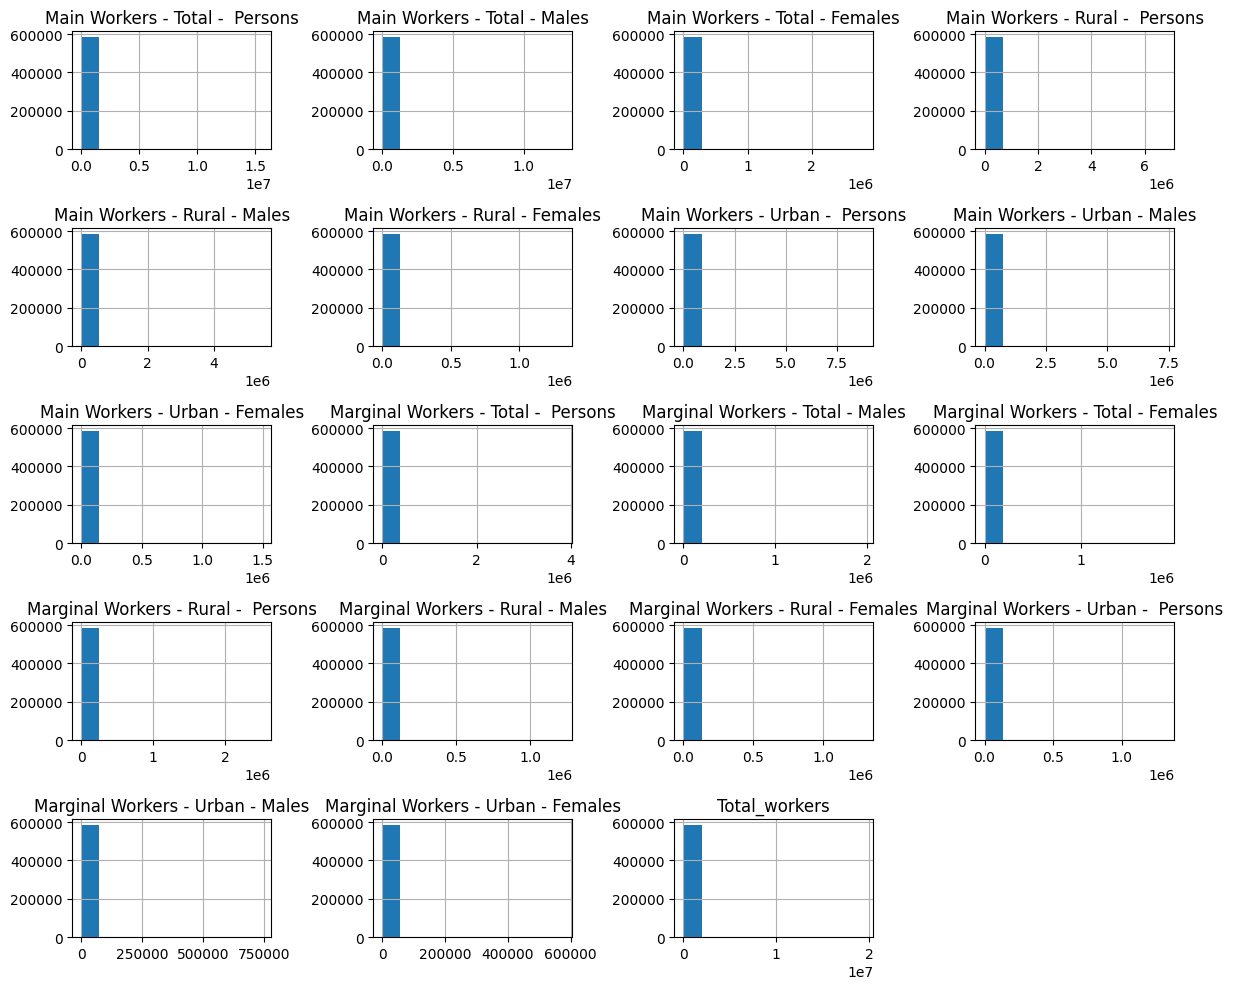

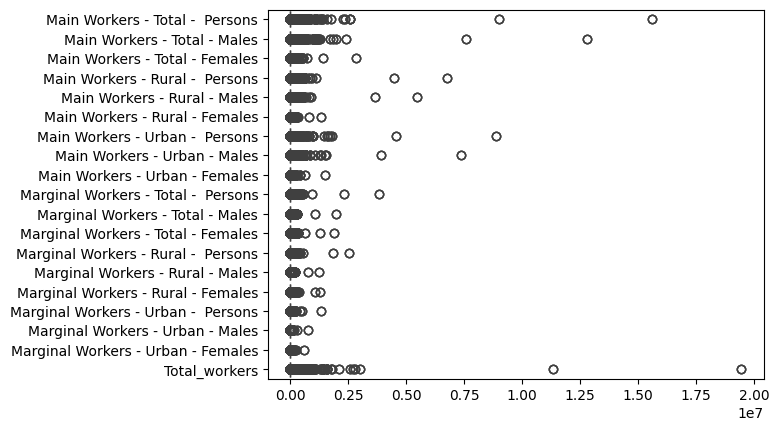

In [84]:
# Histograms for numerical columns
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots for numerical columns
sns.boxplot(data=df, orient="h")
plt.show()


In [ ]:
# Scatter plot for relationship visualization
sns.pairplot(df)
plt.show()

In [87]:
# Cross-tabulation between 'Class' and 'Division'
pd.crosstab(df['Class'], df['Division'])

Division,`00,`01,`02,`03,`05,`06,`07,`08,`09,`10,...,`90,`91,`92,`93,`94,`95,`96,`97,`98,`99
Class,,,,,,,,,,,,,,,,,,,,,
`0000,1482,7965,5121,2703,1734,1263,1236,3324,1440,9042,...,2478,1776,816,2631,3687,3627,2664,2616,942,4647
`0111,0,795,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
`0112,0,600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
`0113,0,759,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
`0114,0,204,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
`9810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,246,0
`9820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,300,0
`9900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,264


In [89]:
from scipy import stats
import numpy as np
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

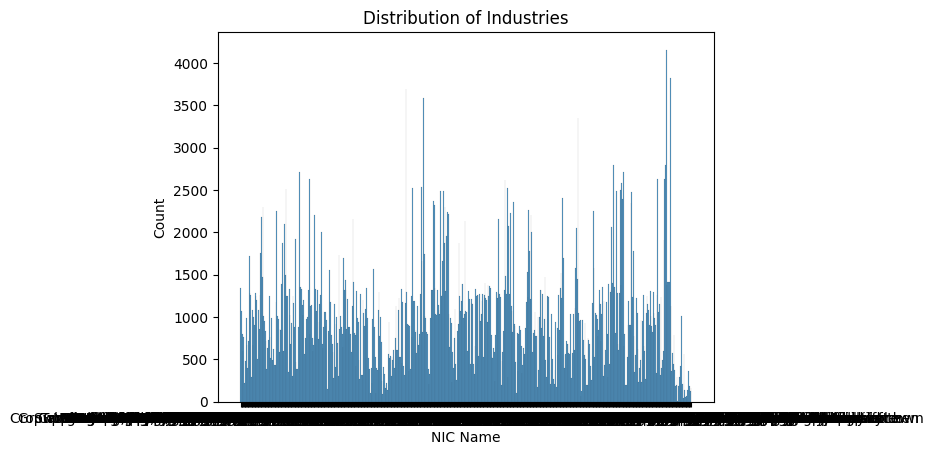

In [90]:
sns.histplot(df['NIC Name'], bins=30)
plt.title('Distribution of Industries')
plt.show()

In [91]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

# Confirm the removal of duplicates
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (194381, 26)


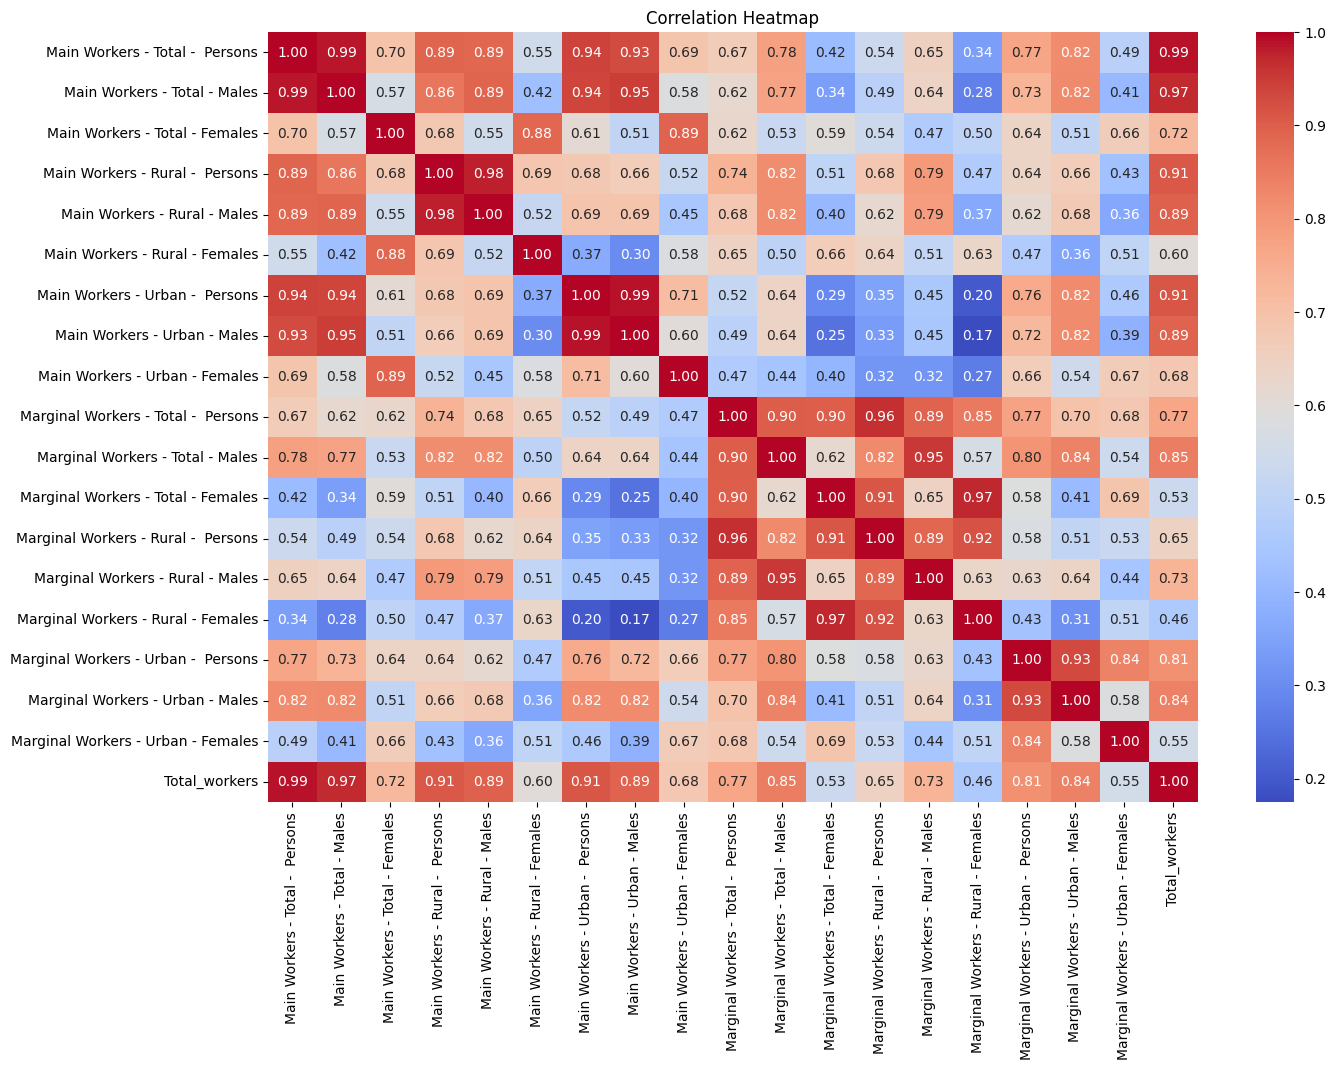

In [92]:
df_corr=df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
correlation_matrix = df[df_corr].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [95]:
!pip install wordcloud 

   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/300.0 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/300.0 kB ? eta -:--:--
   --------------- ------------------------ 112.6/300.0 kB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 112.6/300.0 kB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 112.6/300.0 kB 1.3 MB/s eta 0:00:01
   -------------------------------- ------- 245.8/300.0 kB 1.1 MB/s eta 0:00:01
   -------------------------------- ------- 245.8/300.0 kB 1.1 MB/s eta 0:00:01
   -------------------------------- ------- 245.8/300.0 kB 1.1 MB/s eta 0:00:01
   -------------------------------- ------- 245.8/300.0 kB 1.1 MB/s eta 0:00:01
   -------------------------------- ------- 245.8/300.0 kB 1.1 MB/s eta 0:00:01
   

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


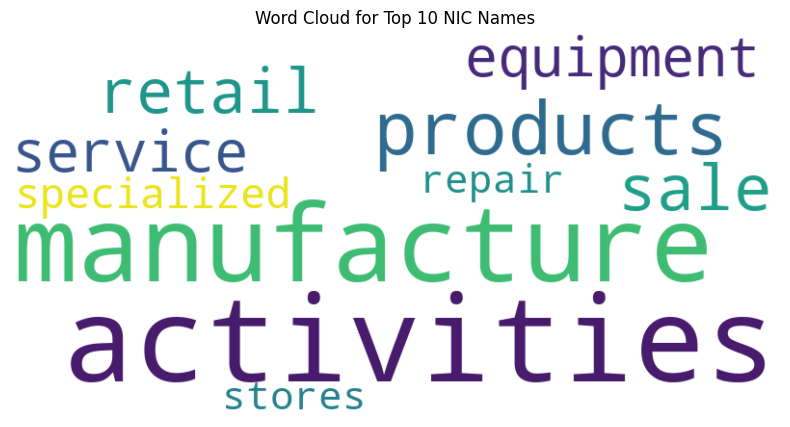

In [96]:
# Tokenize and Clean Text Data

import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')


# Tokenize and clean text data
text = ' '.join(df['NIC Name'])
tokens = word_tokenize(text)
tokens = [word.lower() for word in tokens if word.isalpha()]
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Count word frequency
word_freq = Counter(tokens)
top_words = word_freq.most_common(10)

# Create a word cloud using the top words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Display the word cloud
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Top 10 NIC Names')
plt.axis('off')
plt.show()

In [97]:
# Extract the top 10 most common words and their frequencies
top_words = [pair[0] for pair in word_freq.most_common(10)]
word_counts = [pair[1] for pair in word_freq.most_common(10)]

In [98]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('activities', 59893), ('manufacture', 46545), ('products', 17925), ('sale', 13269), ('retail', 12626), ('service', 10621), ('equipment', 9909), ('specialized', 8811), ('stores', 7803), ('repair', 7679)]


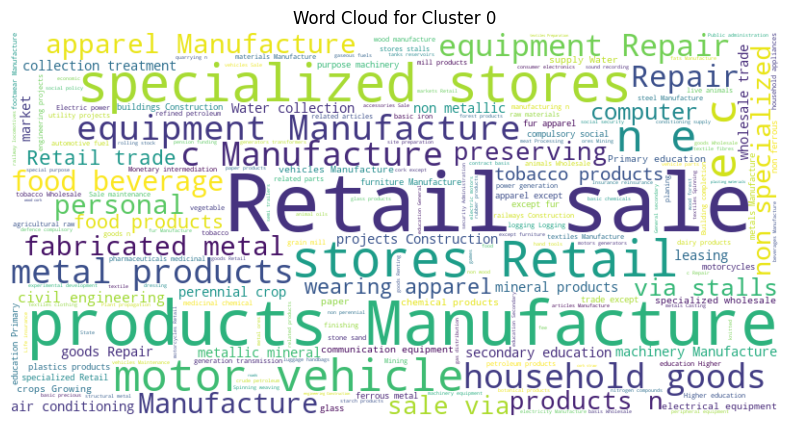

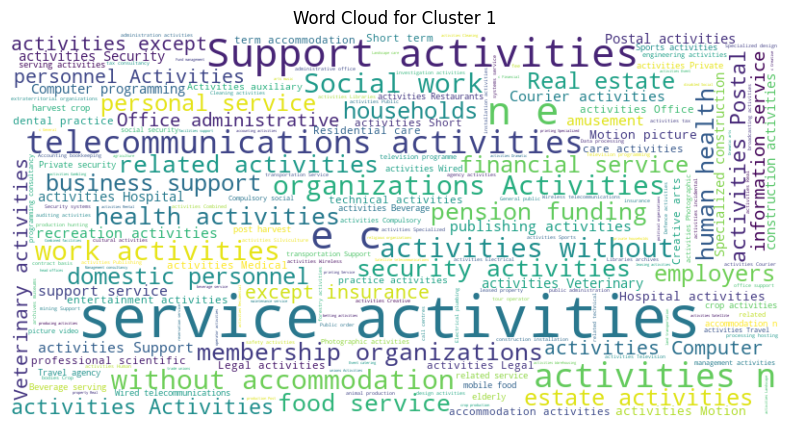

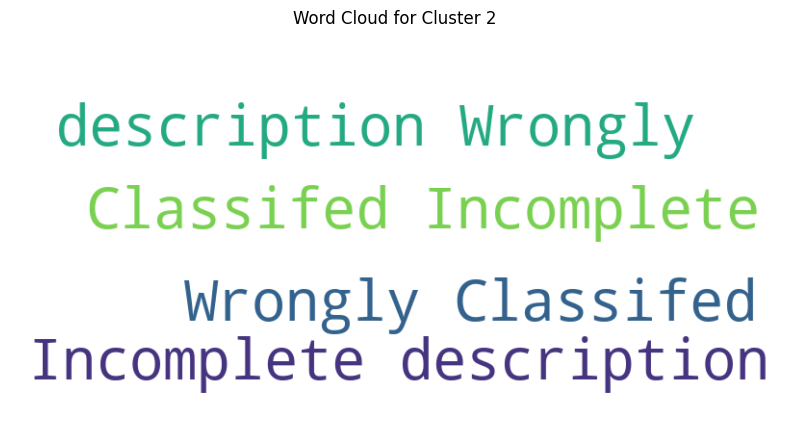

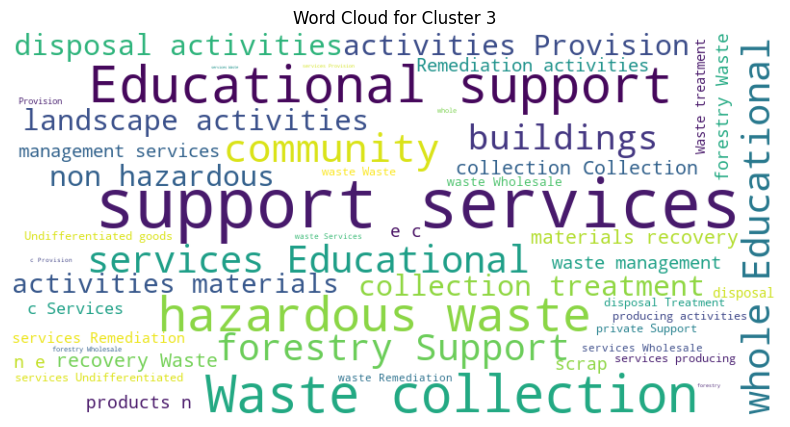

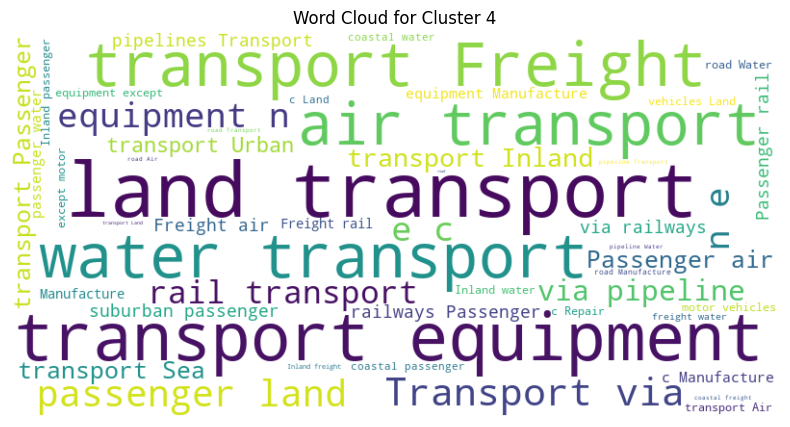

In [99]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')



# Tokenize and clean text data
text = ' '.join(df['NIC Name'])
tokens = word_tokenize(text)
tokens = [word.lower() for word in tokens if word.isalpha()]
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Count word frequency
word_freq = Counter(tokens)
print(word_freq.most_common(10))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['NIC Name'])

# KMeans Clustering
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_tfidf)

# Generate word clouds for each cluster
for cluster in range(num_clusters):
    text_for_cluster = df[df['Cluster'] == cluster]['NIC Name']
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_for_cluster))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.axis('off')
    plt.show()

In [100]:
# Vectorize the Text Data

from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the 'NIC Name' column using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
nic_name_tfidf = vectorizer.fit_transform(df['NIC Name'])
print(nic_name_tfidf )

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 734488 stored elements and shape (194381, 692)>
  Coords	Values
  (0, 144)	0.4286271311876942
  (0, 23)	0.42625726874890973
  (0, 478)	0.3965448872520959
  (0, 299)	0.4953652201763894
  (0, 514)	0.34470367115276856
  (0, 559)	0.2928224139217847
  (0, 4)	0.1654792654116204
  (1, 272)	0.47529731738108927
  (1, 400)	0.41886760582102167
  (1, 430)	0.565070443964407
  (1, 145)	0.5285241548330344
  (2, 272)	0.28197884457974826
  (2, 145)	0.31355664141654294
  (2, 89)	0.41139749814519916
  (2, 531)	0.38102304118324803
  (2, 328)	0.41139749814519916
  (2, 407)	0.41139749814519916
  (2, 557)	0.41139749814519916
  (3, 272)	0.5948727139896167
  (3, 531)	0.8038199140047649
  (4, 272)	0.33451675602268405
  (4, 663)	0.4059688844002812
  (4, 368)	0.4910152084673995
  (4, 537)	0.4910152084673995
  (4, 649)	0.4910152084673995
  :	:
  (194375, 654)	0.5095905713916363
  (194375, 477)	0.5095905713916363
  (194375, 295)	0.42229233830256463
  (19

In [101]:
# Apply Clustering Algorithm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Step 2: Scale the numerical columns for clustering
scaler = StandardScaler()
numerical_columns = [
    'Main Workers - Total -  Persons', 'Main Workers - Total - Males', 'Main Workers - Total - Females',
    'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males', 'Main Workers - Rural - Females',
    'Main Workers - Urban -  Persons', 'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
    'Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females',
    'Marginal Workers - Rural -  Persons', 'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females',
    'Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males', 'Marginal Workers - Urban - Females'
]
numerical_data_scaled = scaler.fit_transform(df[numerical_columns])

# Step 3: Combine TF-IDF features with scaled numerical data
from scipy.sparse import hstack
combined_features = hstack([nic_name_tfidf, numerical_data_scaled])

# Step 4: Determine the number of clusters and fit the KMeans model
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(combined_features)

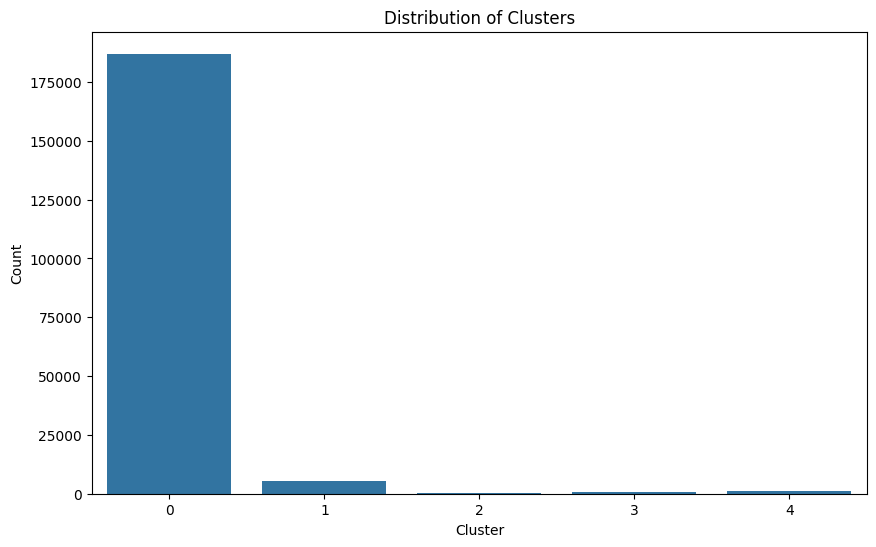

In [102]:
# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [103]:
# Identify Top 10 Most Frequent 'NIC Name' Categories

# Count the frequency of each 'NIC Name'
nic_name_counts = df['NIC Name'].value_counts()

# Get the top 10 most frequent 'NIC Name' categories
top_10_nic_names = nic_name_counts.head(10).index.tolist()

In [104]:
# Filter the DataFrame to Include Only Top 10 'NIC Name' Categories

# Filter the DataFrame to include only rows where 'NIC Name' is in the top 10 most frequent categories
top_10_df = df[df['NIC Name'].isin(top_10_nic_names)]

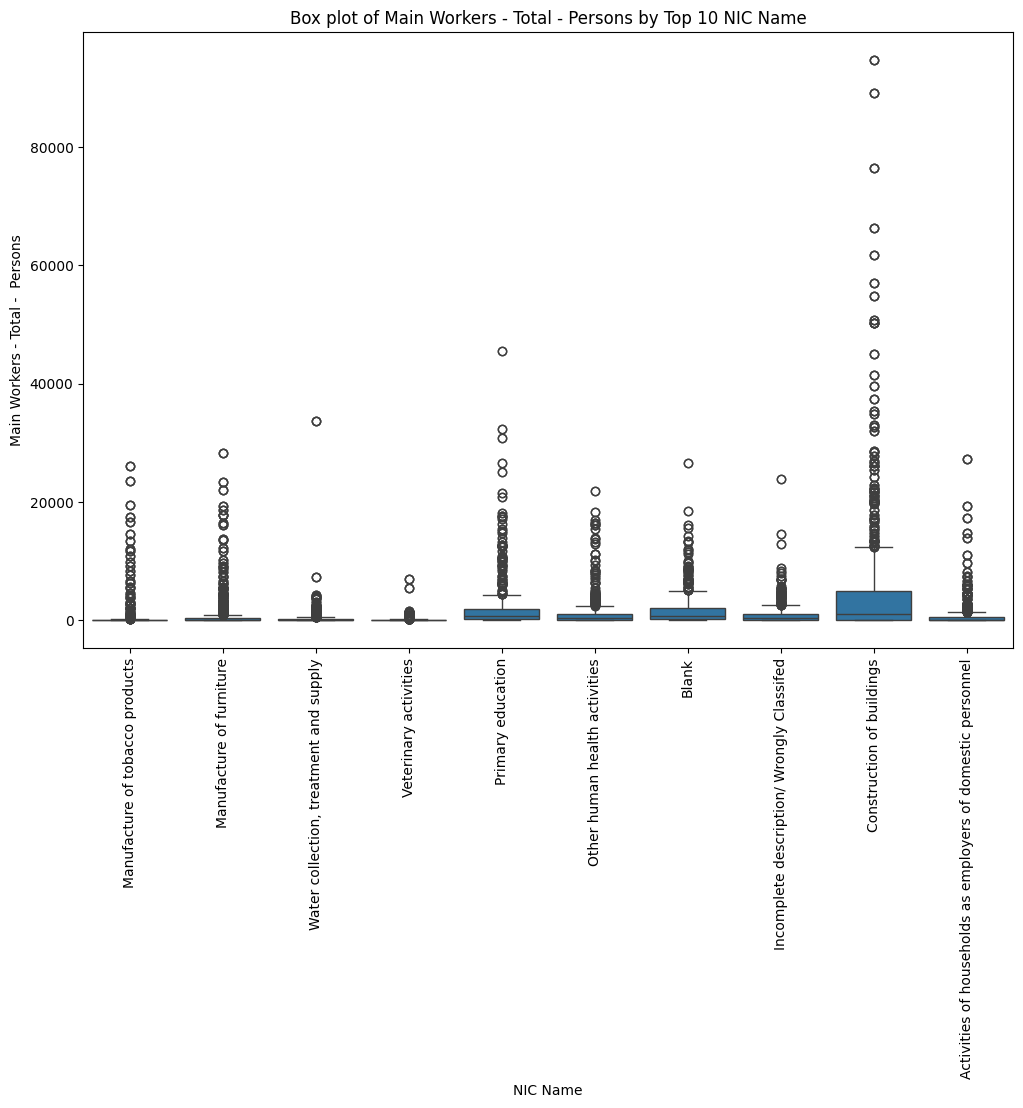

In [105]:
# Create the Box Plot
# Box plot for 'Main Workers - Total - Persons' based on top 10 'NIC Name'
plt.figure(figsize=(12, 8))
sns.boxplot(x='NIC Name', y='Main Workers - Total -  Persons', data=top_10_df)
plt.title('Box plot of Main Workers - Total - Persons by Top 10 NIC Name')
plt.xticks(rotation=90)
plt.show()

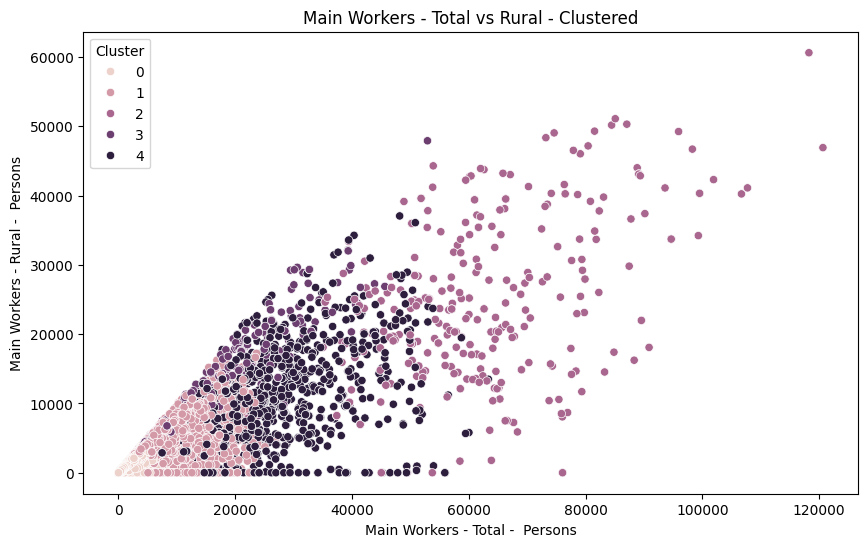

In [106]:
# Create Scatter Plots for Main Workers - Total - Persons
# Plot: Main Workers - Total - Persons vs Main Workers - Rural - Persons
# Scatter plot for 'Main Workers - Total - Persons' vs 'Main Workers - Rural - Persons'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Main Workers - Total -  Persons', y='Main Workers - Rural -  Persons', hue='Cluster', data=df)
plt.title('Main Workers - Total vs Rural - Clustered')
plt.xlabel('Main Workers - Total -  Persons')
plt.ylabel('Main Workers - Rural -  Persons')
plt.show()


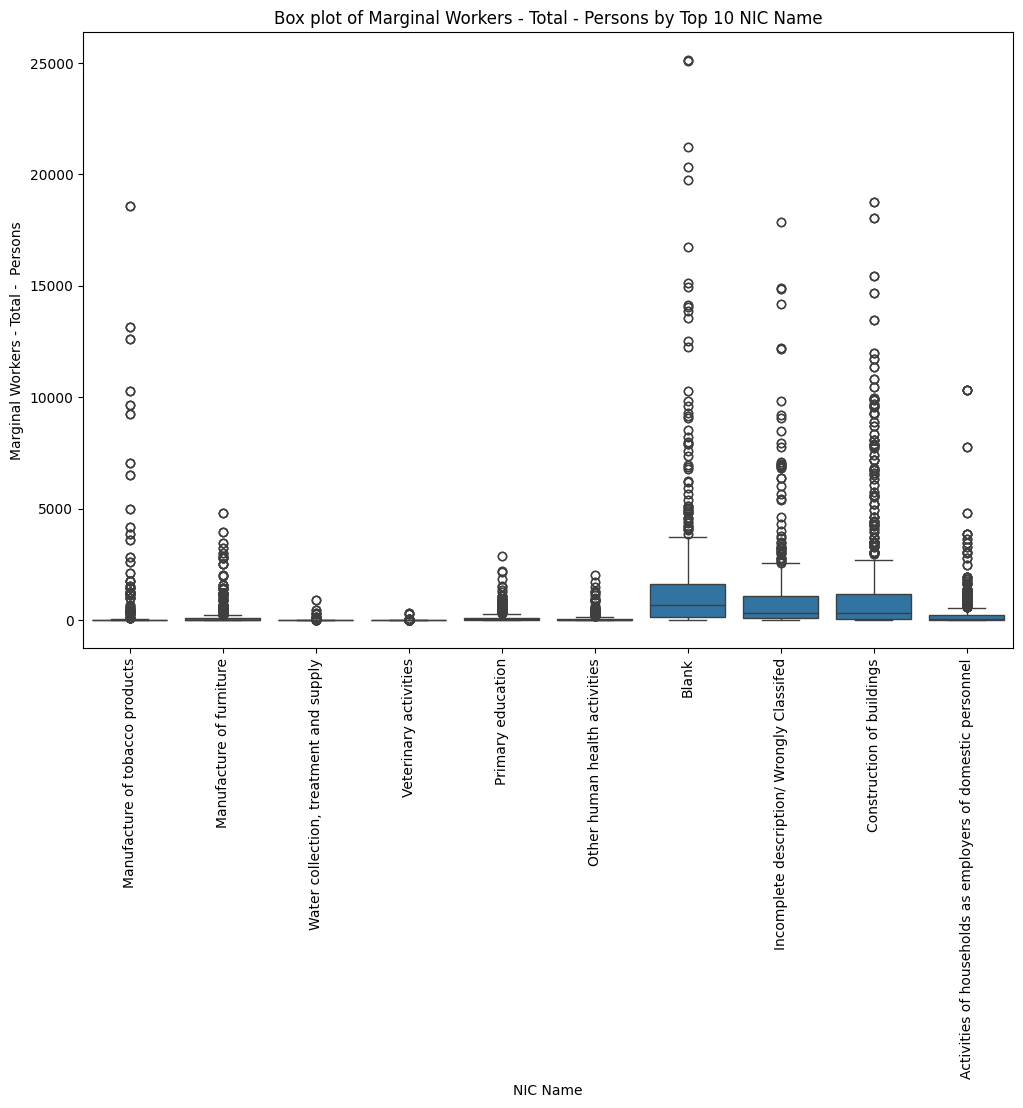

In [107]:
# Create the Box Plot for Marginal Workers - Total - Persons

# Box plot for 'Marginal Workers - Total - Persons' based on top 10 'NIC Name'
plt.figure(figsize=(12, 8))
sns.boxplot(x='NIC Name', y='Marginal Workers - Total -  Persons', data=top_10_df)
plt.title('Box plot of Marginal Workers - Total - Persons by Top 10 NIC Name')
plt.xticks(rotation=90)
plt.show()

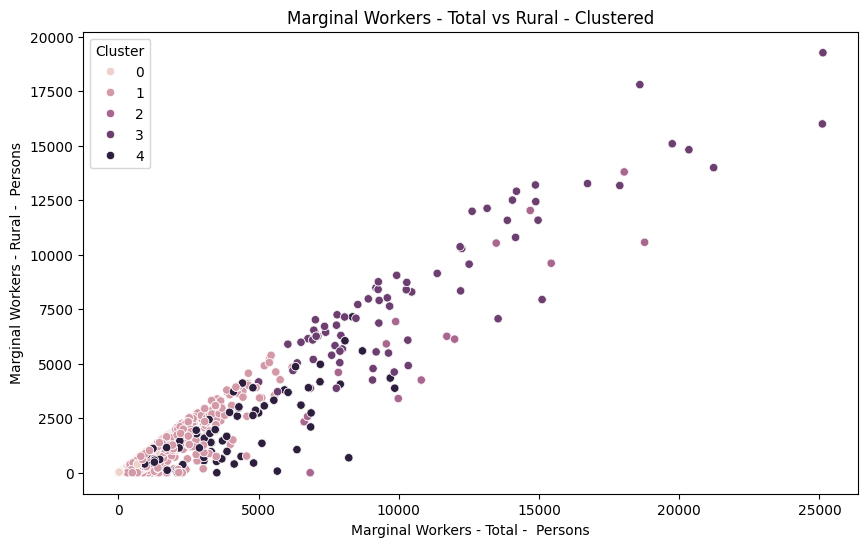

In [108]:
# Create Scatter Plots for Marginal Workers - Total - Persons
# Plot: Marginal Workers - Total - Persons vs Marginal Workers - Rural - Persons
# Scatter plot for 'Marginal Workers - Total - Persons' vs 'Marginal Workers - Rural - Persons'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marginal Workers - Total -  Persons', y='Marginal Workers - Rural -  Persons', hue='Cluster', data=top_10_df)
plt.title('Marginal Workers - Total vs Rural - Clustered')
plt.xlabel('Marginal Workers - Total -  Persons')
plt.ylabel('Marginal Workers - Rural -  Persons')
plt.show()

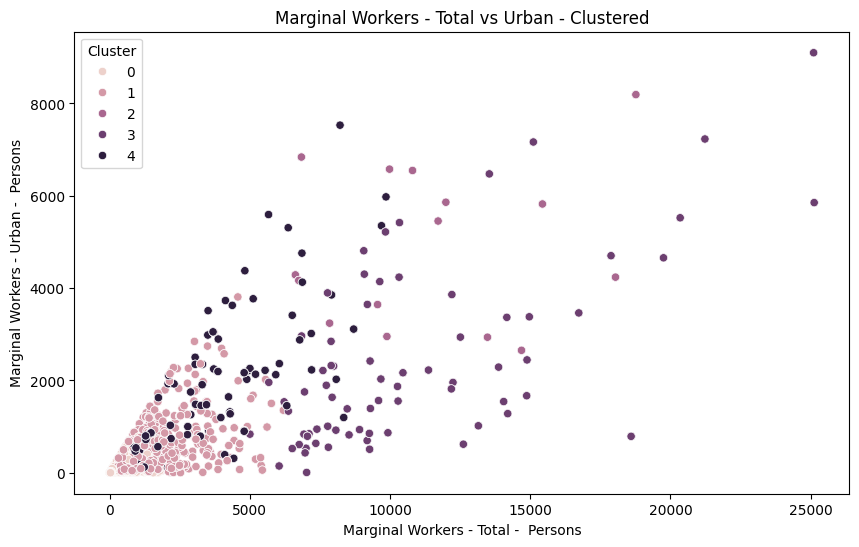

In [109]:
# Scatter plot for 'Marginal Workers - Total - Persons' vs 'Marginal Workers - Urban - Persons'

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marginal Workers - Total -  Persons', y='Marginal Workers - Urban -  Persons', hue='Cluster', data=top_10_df)
plt.title('Marginal Workers - Total vs Urban - Clustered')
plt.xlabel('Marginal Workers - Total -  Persons')
plt.ylabel('Marginal Workers - Urban -  Persons')
plt.show()

In [110]:
# Model building

import pandas as pd

# Check for non-numeric values in a DataFrame
def check_non_numeric(df):
    non_numeric_cols = []
    for col in df.columns:
        try:
            pd.to_numeric(df[col])
        except ValueError:
            non_numeric_cols.append(col)
    return non_numeric_cols

# Call the function to check for non-numeric values
non_numeric_columns = check_non_numeric(df)
print("Columns with non-numeric values:", non_numeric_columns)

Columns with non-numeric values: ['State Code', 'District Code', 'India/States', 'Division', 'Group', 'Class', 'NIC Name']


In [111]:
#  Remove backticks from the 'Class' column
df['Class'] = df['Class'].str.replace('`', '')

# Convert 'Class' column to numeric
df['Class'] = pd.to_numeric(df['Class'], errors='coerce')

In [112]:
# Initialize an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'NIC Name' column to convert text data into numerical vectors
X_nic_name = tfidf_vectorizer.fit_transform(df['NIC Name'])

# Define columns to encode
columns_to_encode = ['State Code', 'District Code','India/States', 'Division', 'Group','NIC Name']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Check data types after encoding
print(df.dtypes)

# Now, X_nic_name contains the TF-IDF transformed 'NIC Name' data, and merged_df_encoded contains the encoded categorical variables.

State Code                             int64
District Code                          int64
India/States                           int64
Division                               int64
Group                                  int64
Class                                  int64
NIC Name                               int64
Main Workers - Total -  Persons        int64
Main Workers - Total - Males           int64
Main Workers - Total - Females         int64
Main Workers - Rural -  Persons        int64
Main Workers - Rural - Males           int64
Main Workers - Rural - Females         int64
Main Workers - Urban -  Persons        int64
Main Workers - Urban - Males           int64
Main Workers - Urban - Females         int64
Marginal Workers - Total -  Persons    int64
Marginal Workers - Total - Males       int64
Marginal Workers - Total - Females     int64
Marginal Workers - Rural -  Persons    int64
Marginal Workers - Rural - Males       int64
Marginal Workers - Rural - Females     int64
Marginal W

In [113]:
def check_non_numeric(df):
    non_numeric_cols = []
    for col in df.columns:
        try:
            pd.to_numeric(df[col])
        except ValueError:
            non_numeric_cols.append(col)
    return non_numeric_cols

# Remove backticks from the 'Class' column
df['Class'] = df['Class'].replace('`', '')

# Convert 'Class' column to numeric
df['Class'] = pd.to_numeric(df['Class'], errors='coerce')

In [114]:
# Assuming 'Class' is the target variable
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R² score:', r2_score(y_test, y_pred))

Mean Absolute Error: 1883.9907816928621
Mean Squared Error: 6032937.872428064
Root Mean Squared Error: 2456.203955787887
R² score: 0.3539701768429465


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Check for non-numeric values in a DataFrame
def check_non_numeric(df):
    non_numeric_cols = []
    for col in df.columns:
        try:
            pd.to_numeric(df[col])
        except ValueError:
            non_numeric_cols.append(col)
    return non_numeric_cols

# Call the function to check for non-numeric values
non_numeric_columns = check_non_numeric(df)
print("Columns with non-numeric values:", non_numeric_columns)

# Remove backticks from the 'Class' column
df['Class'] = df['Class'].replace('`', '')

# Convert 'Class' column to numeric
df['Class'] = pd.to_numeric(df['Class'], errors='coerce')

# Define columns to encode
categorical_features = ['State Code', 'District Code', 'India/States', 'Division', 'Group']
text_column = 'NIC Name'

# Define preprocessing steps for categorical features and text column
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
text_transformer = TfidfVectorizer(stop_words='english')

# Create a preprocessor to apply transformations to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, text_column)
    ])

# Define the model pipeline
Model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

Columns with non-numeric values: []
